### Multithreading

* Bir işletim sistemi üzerinde herhangi bir dil ile kodlanmış ve bir compiler (derleyici) ile derlenmiş ve daha sonra hafızaya yüklenerek işlemcide çalıştırılan programlara process denir. Kısacası bir programın çalışan hali processtir.

* Threadler ise processlerin içerisinde yer alan eş zamanlı olarak çalışabilen iş parçacıklarıdır. Yani threadler sayesinde kodlarımızı ardaşık olarak yürütmek yerine eş zamanlı olarak yürütebiliriz.

* Multithreading, çoğu yazılım dili tarafından desteklenen temel programlama prensibidir ve bir programda aynı zamanda birden fazla işin yapılabilmesini sağlamaktadır. Yani bir kod parçası bir işlemi gerçekleştirirken aynı anda ona paralel olarak bir başka kod parçasının da çalışması demektir. Multithread yapısında olmayan programlar, main thread isimli tek bir thread üzerinden yürütülürler.

![](1-Figures/m1.png), ![](1-Figures/m2.png)

Thread kullanmak;

* Kaynak paylaşımı
* Daha az bekleme süresi
* Daha verimli donanım kullanımı

gibi faydalar sağlamaktadır.

## 1. Multithreading Modülü

---
Python dilini kullanarak threadler ile ilgili uygulamalar geliştirmek istiyorsak aşağıdaki iki modülden birisini import etmemiz gerekmektedir. Bu modüller;

* thread
* threading

modülleridir.

thread modülü python 3 ile birlikte (_thread) olarak değişmiştir. _thread ve threading modülleri arasındaki temel fark threading modülünün nesne dayalı programlama prensibini desteklemesidir.

---

In [1]:
import _thread #_thread modülünü import ettik

def f(threadName):  #threadin hedefi olan fonksiyon
    i =0
    
    while i<7:
        print(threadName ,"çalışıyor")
        i=i+1

_thread.start_new_thread(f,("thread-1",)) #thread tanımladık ve aynı zamanda threadi start metodu ile çalıştırdık
_thread.start_new_thread(f,("thread-2",))

thread-2 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor


8660

thread-1 çalışıyor
thread-1 çalışıyor
thread-1 çalışıyor
thread-1 çalışıyor
thread-1 çalışıyor
thread-1 çalışıyor
thread-1 çalışıyor


Yukarıda yer alan kodda thread ile ilgili fonksiyonları kullanabilmek için ilk önce _thread modülünü import ettik.

_thread.start_new_thread(f,(“thread-1”,)) ile yeni bir thread tanımladık ve threade hedef olarak f fonksiyonunu parametre olarak “thread-1”i verdik ve start ile çalıştırdık. Fonksiyon ile çalışan threadi 7 kere ekrana yazdırdık.

---

In [2]:
import threading #threading modülünü import ettik

def f(threadName): 
    i =0
    while i<7:
        print(threadName ,"çalışıyor")
        i=i+1

t1 = threading.Thread(target=f,args = ("thread-1", ))  #threadi tanımladık ve f fonksiyonunu hedef gösterdik
t1.start() #threadi çalıştırdık
t2 = threading.Thread(target=f,args = ("thread-2", ))
t2.start()

thread-1 çalışıyor
thread-1 çalışıyor
thread-1 çalışıyor
thread-1 çalışıyor
thread-1 çalışıyor
thread-1 çalışıyor
thread-1 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor
thread-2 çalışıyor


Yukarıdaki kodda ilk olarak threading modülünü import ettik.

t1 = threading.Thread(target=f,args = (“thread-1”, )) kodu ile t1 adında bir thread oluşturduk, threade hedef olarak f fonksiyonunu parametre olarak da “thread-1”i verdik. Start() komutuyla threadi çalıştırdık. 

Aynı şekilde iki threadi de ekrana 7 kere yazdırdık. 

___

In [8]:
import _thread
import time

# threadin yapması gereken isleri fonksiyonun içerisinde tanimliyoruz
def print_time( threadName, beklemeSuresi):
    count = 0
    while count < 5:
        time.sleep(beklemeSuresi)
        count += 1
        print ("%s: %s" % ( threadName, time.ctime(time.time()) ))

# İki thread olusturduk ve çalistirdik
try:
    _thread.start_new_thread( print_time, ("Thread-1", 5,) )
    _thread.start_new_thread( print_time, ("Thread-2", 3,) )
except:
    print ("Error : thread çalışmadı")

Thread-2: Wed Apr 21 14:03:29 2021
Thread-1: Wed Apr 21 14:03:31 2021
Thread-2: Wed Apr 21 14:03:32 2021
Thread-2: Wed Apr 21 14:03:35 2021
Thread-1: Wed Apr 21 14:03:36 2021
Thread-2: Wed Apr 21 14:03:38 2021
Thread-1: Wed Apr 21 14:03:41 2021
Thread-2: Wed Apr 21 14:03:41 2021
Thread-1: Wed Apr 21 14:03:46 2021


Yukarıda yer alan kodda ilk olarak _thread ve date modülünü import ettik. İlgili modülleri import ettikten sonra try bloğu içerisinde iki tane thread tanımladık, tanımladığımız threadlere hedef olarak print_time fonksiyonunu (threadin yapacağı iş) parametre olarak da “thread-1” ve 1’i verip çalıştırdık. Ekran çıktısı yukarıdaki gibidir. Thrad-1 1 saniye bekleme süresi ile ekrana tarihi ve sistemin saatini yazdırmaktadır. Thread-2 ise 3 saniye bekleme süresi ile ekrana tarihi ve sistemin saatini yazdırmaktadır.

---

In [10]:
#Threadler ile faktöriyel hesabı;

import _thread

threadId = 1

def factorial(n):
    global threadId
    if n < 1:   
        print ("%s: %d" % ("Thread", threadId ))
        threadId += 1
        return 1
    else:
        returnNumber = n * factorial( n - 1 )  # recursive fonksiyon
        print(str(n) + '! = ' + str(returnNumber))
        return returnNumber

_thread.start_new_thread(factorial,(15, ))
_thread.start_new_thread(factorial,(5, ))

15720

Thread: 1
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880
10! = 3628800
11! = 39916800
12! = 479001600
13! = 6227020800
14! = 87178291200
15! = 1307674368000
Thread: 2
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120


---
## 2. Threading Modülünün Metotları

threading modülünün _thread modülünden nesneye dayalı programlama prensiblerini desteklemesi yönünden farklıdır. Bunun yanında threading modülü _thread modülünün tüm metodlarını içerir ve _thread modülüne ek bazı metodları da destekler. Bu metodlar aşağıdaki gibidir:

* threading.activeCount() : Aktif olarak çalışan thread sayısını geri döndürür.
* threading.enumerate() : Aktif olarak çalışan threadlerin listesini geri döndürür.
* threading.main_thread() : Main threadi geri döndürür.
* threading.get_ident() : Threadin tanımlayıcısını (identifier) geri döndürür.

In [12]:
import threading #threading modülünü import ettik

def f(threadName): 
    i =0
    while i<10:
        #print(threadName ,"çalışıyor")
        i=i+1

t1 = threading.Thread(target=f,args = ("thread-1", ))  #threadi tanımladık ve f fonksiyonunu hedef gösterdik
t1.start() #threadi çalıştırdık

print(threading.activeCount())  #çalışan thread sayısı

print(threading.enumerate())    #çalışan thread listesi

print(threading.main_thread())  #main thread

print(threading.get_ident())    #thread tanımlayıcısı

5
[<_MainThread(MainThread, started 10792)>, <Thread(Thread-4, started daemon 3884)>, <Heartbeat(Thread-5, started daemon 8928)>, <HistorySavingThread(IPythonHistorySavingThread, started 6516)>, <ParentPollerWindows(Thread-3, started daemon 8836)>]
<_MainThread(MainThread, started 10792)>
10792


---
## 3. Thread Sınıfı Metotları

Thread sınıfının metodları aşağıdaki gibidir.

* run() : Threadin etkinliğini yaptığı işi temsil eder.
* start() : Threadin yapacağı işi, etkinliğini başlatır. run() metodunun çalıştırılmasını sağlar.
* join([time]) : Thread sonlanana kadar bekler.
* isAlive() : Threadin hala çalışıp çalışmadığını kontrol eder. True, false değer döndürür.
* getName() : Threadin adını döndürür.
* setName() : Threadin adını set eder.

In [13]:
import threading 
import time

class myThread (threading.Thread):  #myThread isimli sinifimiz Thread sinifindan miras aldı.
    
    def __init__(self, threadID, name, counter): #myThread isimli sinifin constructori
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter
        
    def run(self):
        print ("Starting " + self.name)
        print_time(self.name, 5, self.counter)
        print ("Exiting " + self.name)

def print_time(threadName, counter, beklemeSuresi):
    while counter:
        time.sleep(beklemeSuresi)
        print ("%s: %s" % (threadName, time.ctime(time.time())))
        counter -= 1

thread1 = myThread(1, "Thread-1", 1) #thread tanımladık
thread2 = myThread(2, "Thread-2", 2)

thread1.start()  #threadleri çalıştırdık
thread2.start()

print(thread1.isAlive())
print(thread1.getName())
thread2.setName("thread-3")

Starting Thread-1
Starting Thread-2True
Thread-1


<ipython-input-13-27987e433dda>:29: DeprecationWarning: isAlive() is deprecated, use is_alive() instead
  print(thread1.isAlive())



Thread-1: Wed Apr 21 10:51:45 2021
thread-3: Wed Apr 21 10:51:46 2021Thread-1: Wed Apr 21 10:51:46 2021

Thread-1: Wed Apr 21 10:51:47 2021
thread-3: Wed Apr 21 10:51:48 2021
Thread-1: Wed Apr 21 10:51:48 2021
Thread-1: Wed Apr 21 10:51:49 2021
Exiting Thread-1
thread-3: Wed Apr 21 10:51:50 2021
thread-3: Wed Apr 21 10:51:52 2021
thread-3: Wed Apr 21 10:51:54 2021
Exiting thread-3


* Yukarıda yer alan örnekte Thread sınıfını kullandık. Oluşturmuş olduğumuz myThread isimli sınıf Thread sınıfından miras almıştır.

* def __init__(self, threadID, name, counter): satırı ile bu sınıfa ait bir constructor oluşturduk ve bu constructor içerisinde ilk değer ataması gerçekleştirdik.

* thread1 = myThread(1, “Thread-1”, 1) satırı ile yeni bir thread tanımladık ve bu threadi thread1.start() satırı ile çalıştırdık. Start() metodu ile run() metodu tetiklendi ve thread asıl gerçekleştirmesi gereken işi bu şekilde gerçekleştirdi.

* Ayrıca, kodun son bölümünde thread’ler çalışırken thread ismini değiştirdik.

In [32]:
# Calculate the moment of inertia
def moment_of_inertia_circular( h ): 
    I = 3.14 * h**4  / 12
    return I

def moment_of_inertia_rect( b, h ): 
    I = (b  *  h**3) / 12
    return I        

def normal_stress_distribution( Q , L , E , dim , n = 2 , plotFlag = False ) :
    """
    Description: This function creates the normal stress distribution of the simple beam
    
    Input: 
    Q : Distributed Load
    L : Length of Beam
    E : Elasticity Modulus of the Material
    dim :
    n : optional 
    
    Output : 
    
    stressMax : Max stress
    stressDistribution: 
    """
    # Calculate the max bending moment
    M_max = (Q * L**2)/8 # maximum moment

    # Section definition
    
    if len( dim ) == 1 : 
        print( "Section is circular")
        h = dim[0]
        #I = moment_of_inertia_circular( h)
        I_f = lambda x : 3.14 * x**4  / 12
        I = I_f(h) 
    else :
        print( "Section is rectangular")
        b = dim[0]
        h = dim[1]
        # Calculate the moment of inertia
        I = moment_of_inertia_rect( b, h )
    
    # Define the y values
    y_values = [ -h/2 + h/n * item for item in range(n+1) ] # distance of interim points to the NA
    
    # Obtain the stress distribution 
    
    stressDistribution = []
    for i in y_values : 
        stressDistribution.append( (M_max)/(E * I) * i )  

    # Compute the max stress value
    stressMax = max( stressDistribution )
    
    # Visualize
#     if plotFlag == True:
    import matplotlib.pyplot as plt
    plt.plot( stressDistribution , y_values , "k")
    plt.box(False)
    plt.axhline(0)
    plt.axvline(0)
    plt.title( f"Max strain is {stressMax}")
    
    # Return 
    return print(f"Maximum Stress is : {stressMax}\n",
                 f'Stress Distribution Serie is : {stressDistribution}\n',
                 f'Neutral Axis along the section is : {y_values}') 

Section is circular
Maximum Stress is : 4.777070063694268e-05
 Stress Distribution Serie is : [-4.777070063694268e-05, 0.0, 4.777070063694268e-05]
 Neutral Axis along the section is : [-2.5, 0.0, 2.5]


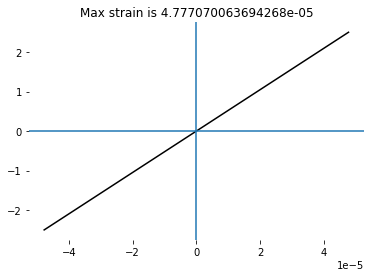

In [33]:
normal_stress_distribution(20 , 5 , 20000 , [5])

Section is rectangular
Maximum Stress is : 1.0416666666666665e-06
 Stress Distribution Serie is : [-1.0416666666666665e-06, 0.0, 1.0416666666666665e-06]
 Neutral Axis along the section is : [-15.0, 0.0, 15.0]


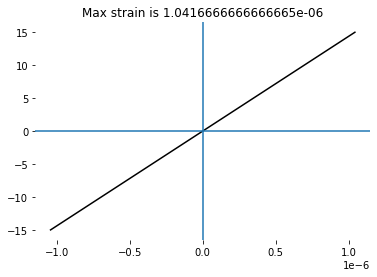

In [34]:
normal_stress_distribution(20 , 5 , 20000 , [20,30] , n = 2 , plotFlag = False)

Section is circular
Section is rectangular
Maximum Stress is : 0.004777070063694267
 Stress Distribution Serie is : [-0.004777070063694267, 0.0, 0.004777070063694267]
 Neutral Axis along the section is : [-2.5, 0.0, 2.5]
Maximum Stress is : 0.00010416666666666667
 Stress Distribution Serie is : [-0.00010416666666666667, 0.0, 0.00010416666666666667]
 Neutral Axis along the section is : [-15.0, 0.0, 15.0]


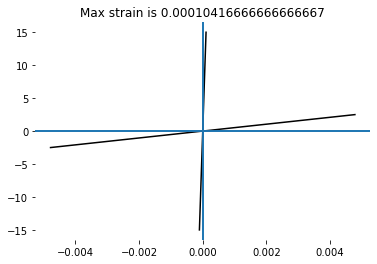

In [36]:
import _thread

# # İki thread olusturduk ve çalistirdik
# _thread.start_new_thread( normal_stress_distribution, (20 , 5 , 20000 , [5]) ) #circular için işlem yapması bekleniyor
# _thread.start_new_thread( normal_stress_distribution, (20 , 5 , 20000 , [20,30]) ) #rectangular için işlem yapması bekleniyor


t1 = threading.Thread(target=normal_stress_distribution, args = (20 , 5 , 200 , [5]))  #threadi tanımladık ve f fonksiyonunu hedef gösterdik
t1.start() #threadi çalıştırdık
t2 = threading.Thread(target=normal_stress_distribution,args = (20 , 5 , 200 , [20,30]))
t2.start()